# IMPORTS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#for cramer v
from scipy import stats as ss

In [3]:
data = pd.read_csv('../PS_20174392719_1491204439457_log.csv')

In [4]:
df1 = data.copy()

In [5]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
#     display( HTML( '<style>.container { width:100% !important; }</style>') )
#     pd.options.display.max_columns = None
#     pd.options.display.max_rows = None
#     pd.set_option( 'display.expand_frame_repr', True )
    
    sns.set()

In [6]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Helper functions

In [7]:
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )

# DATA DESCRIPTION

In [8]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows: 6362620
Number of columns: 11


In [9]:
df1.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
df1.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [11]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )
# time_attributes = df1.select_dtypes( include=['datetime64[ns]'] )

## Check NAs

In [12]:
df1.isna().sum() / len( df1 )

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

## Numerical

In [13]:
# Central Tendency - Mean, Mediana
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersions - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenar
ct = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
ct.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
ct

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,step,1.0,7.430000e+02,7.420000e+02,2.433972e+02,239.000,1.423320e+02,0.375177,0.329071
1,amount,0.0,9.244552e+07,9.244552e+07,1.798619e+05,74871.940,6.038582e+05,30.993949,1797.956705
2,oldbalanceOrg,0.0,5.958504e+07,5.958504e+07,8.338831e+05,14208.000,2.888242e+06,5.249136,32.964879
3,newbalanceOrig,0.0,4.958504e+07,4.958504e+07,8.551137e+05,0.000,2.924048e+06,5.176884,32.066985
4,oldbalanceDest,0.0,3.560159e+08,3.560159e+08,1.100702e+06,132705.665,3.399180e+06,19.921758,948.674125
5,newbalanceDest,0.0,3.561793e+08,3.561793e+08,1.224996e+06,214661.440,3.674129e+06,19.352302,862.156508
6,isFraud,0.0,1.000000e+00,1.000000e+00,1.290820e-03,0.000,3.590479e-02,27.779538,769.702982
7,isFlaggedFraud,0.0,1.000000e+00,1.000000e+00,2.514687e-06,0.000,1.585775e-03,630.603629,397659.062500


## Categorical

In [14]:
cat_attributes.describe()

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C2098525306,C1286084959
freq,2237500,3,113


## Data Balance

In [15]:
df1['isFraud'].value_counts()/len(df1['isFraud'])*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

In [16]:
df1['isFlaggedFraud'].value_counts()/len(df1['isFlaggedFraud'])*100

0    99.999749
1     0.000251
Name: isFlaggedFraud, dtype: float64

# ANÁLISE EXPLORATÓRIA

## Hipóteses

In [127]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### timestep
**1.** step de fraudes são uniformes e transações verdadeiras não
### type
**1.** Transações do tipo transfer e cash-out tem mais risco de fraude
### amount
**1.** Amount maiores tem mais risco de fraude
### nameOrig
**1.** fraudadores nunca usam o mesmo nome
### caixa origem
**1.** fraudadores começam a conta com 0
**2.** Fluxo diferente de amount indica fraude
### nameDest
**1.** fraudadores gostam mais de fraudar com pessoas físicas
**2.** Alguma correlacao entre a primeira letra e fraudes
### caixa destino
**1.** Fluxo diferente de amount indica fraude (tirando merchants)
**1.** Fluxo negativo indica fraude
### isFlaggedFraud
**1.** flagged fraud quase não tem falso-positivo

## 1st feature engineering

In [128]:
df2=df1.copy()

In [129]:
df2['FluxOrig']=df2['newbalanceOrig']-df2['oldbalanceOrg']
df2['FluxDest']=df2['newbalanceDest']-df2['oldbalanceDest']

In [130]:
df2['amount_anomaly_orig']=(round(abs(df2['FluxOrig']),2)!=df2['amount'])
df2['amount_anomaly_dest']=(round(abs(df2['FluxDest']),2)!=df2['amount'])

In [131]:
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,FluxOrig,FluxDest,amount_anomaly_orig,amount_anomaly_dest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,-9839.64,0.00,False,True
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,-1864.28,0.00,False,True
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,-181.00,0.00,False,True
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,-181.00,-21182.00,False,True
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,-11668.14,0.00,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,-339682.13,339682.13,False,False
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,-6311409.28,0.00,False,True
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,-6311409.28,6311409.27,False,True
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,-850002.52,0.00,False,True


In [132]:
# df2[df2.nameDest.apply(lambda x: x[0]=='M')]

## Análise univariada

In [133]:
df2.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'FluxOrig', 'FluxDest', 'amount_anomaly_orig',
       'amount_anomaly_dest'],
      dtype='object')

In [134]:
num_attributes = df2.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df2.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### Numerical

In [135]:
num_attributes_isnotfraud=num_attributes[num_attributes['isFraud']==0]

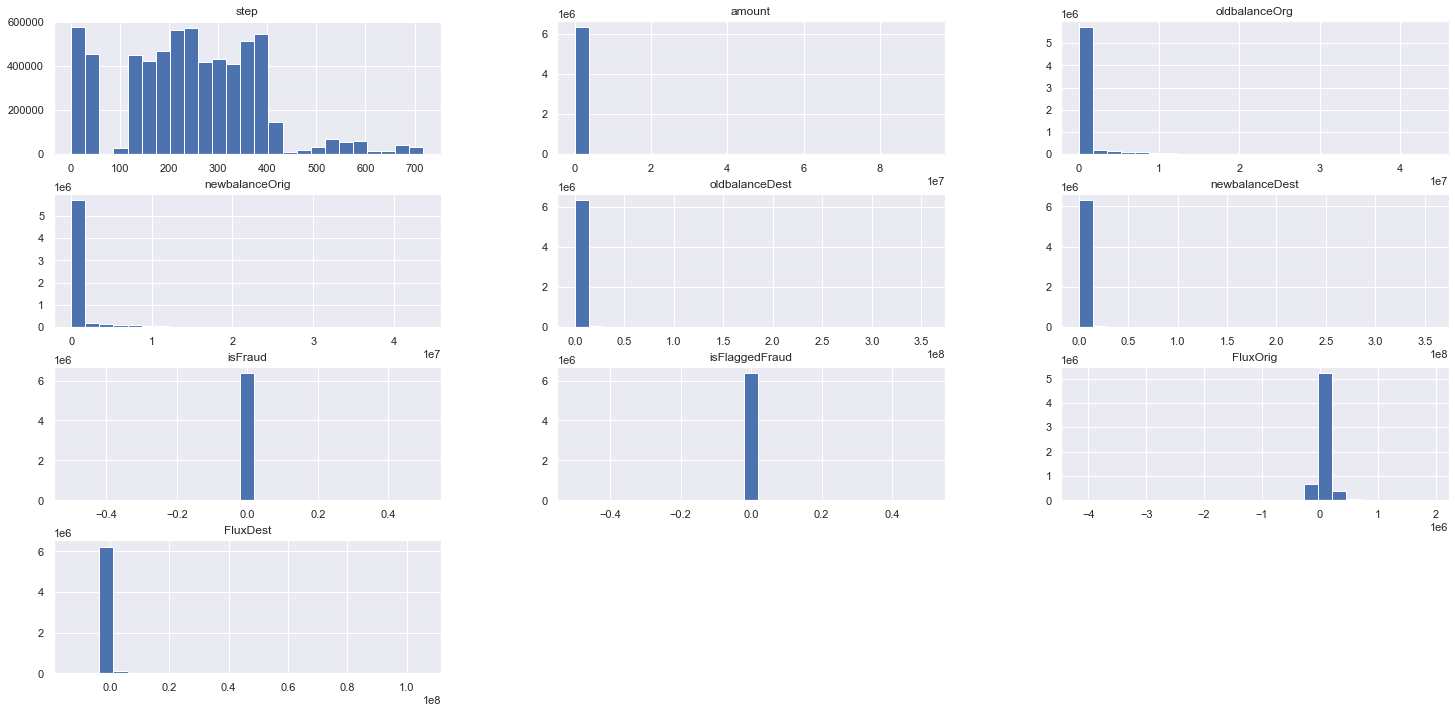

In [136]:
num_attributes_isnotfraud.hist( bins=25);

In [137]:
num_attributes_isfraud=num_attributes[num_attributes['isFraud']==1]

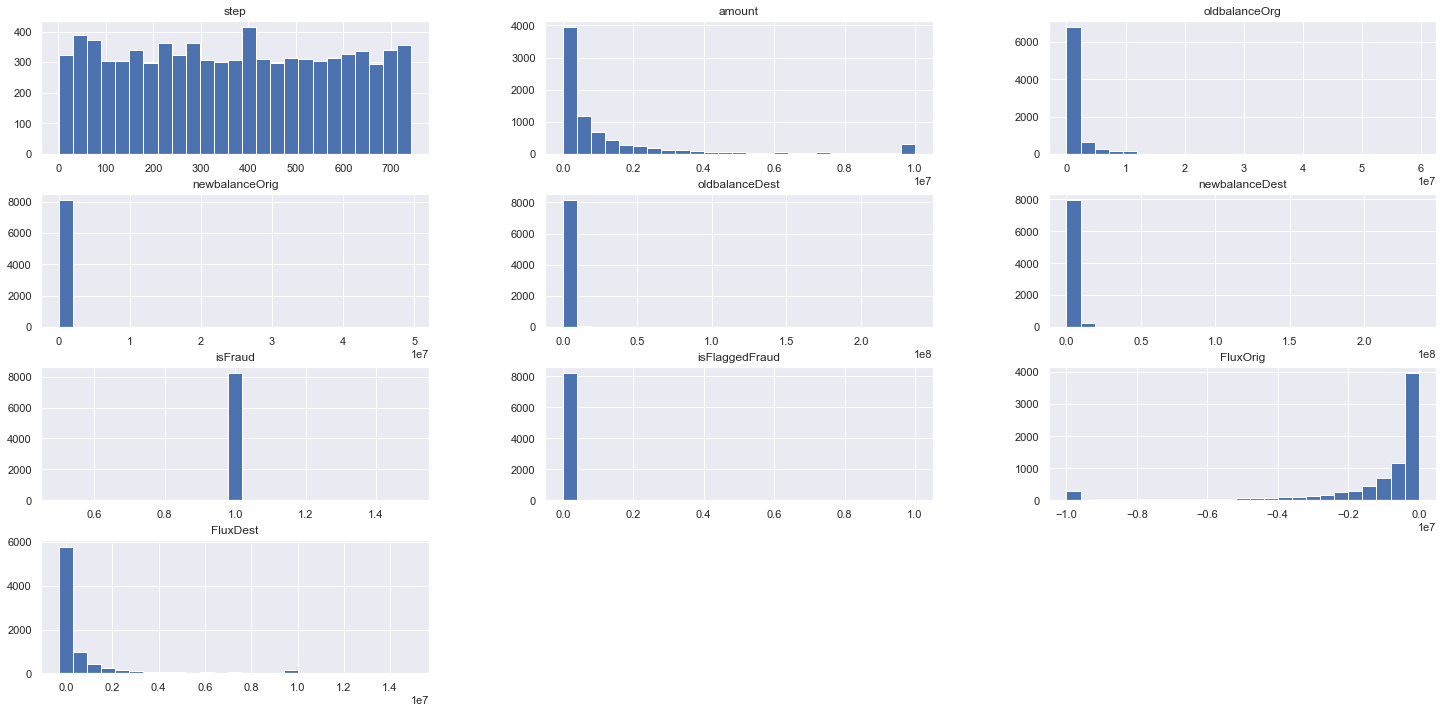

In [138]:
num_attributes_isfraud.hist( bins=25);

### Categorical

<AxesSubplot:xlabel='type', ylabel='count'>

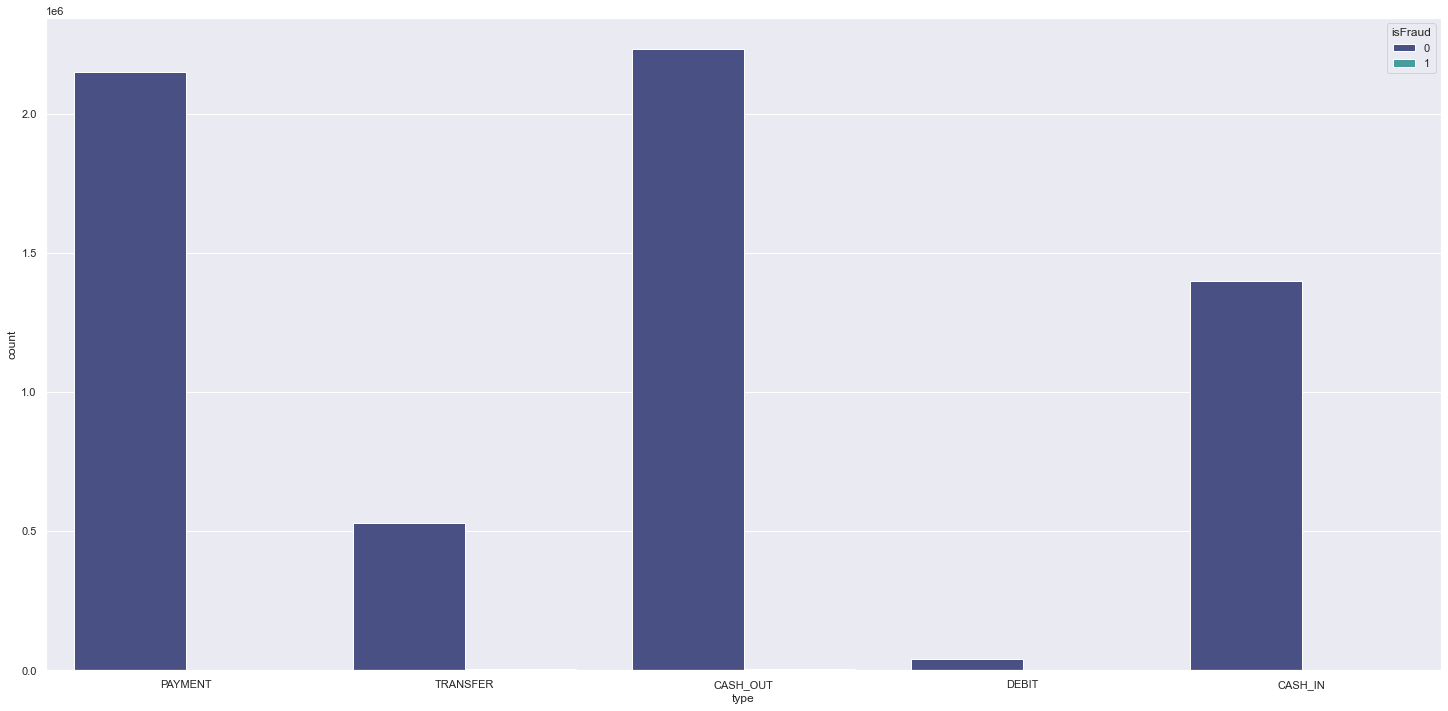

In [139]:
sns.countplot(x='type',hue='isFraud',data=df1,palette='mako')

<AxesSubplot:xlabel='type', ylabel='count'>

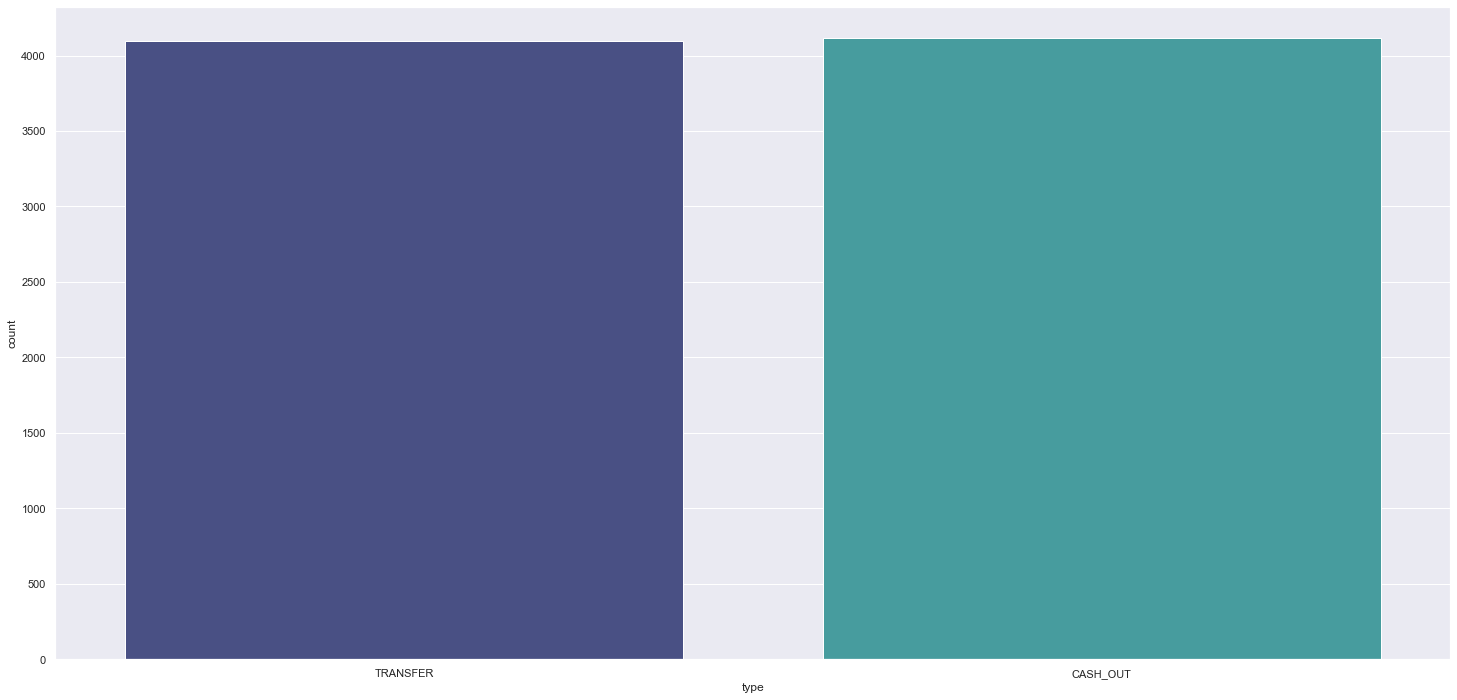

In [140]:
aux=df1[df1['isFraud']==1]
sns.countplot(x='type',data=aux,palette='mako')

## Análise multivariada

### Numerical

<AxesSubplot:>

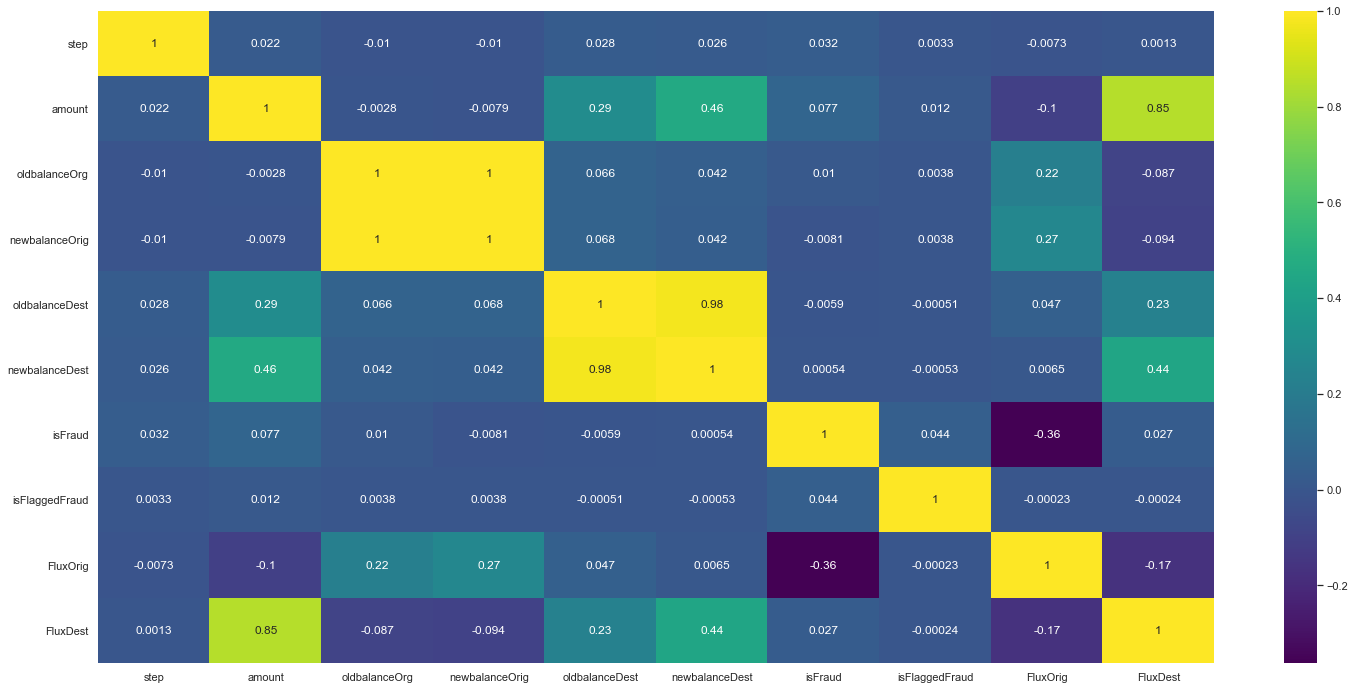

In [141]:
sns.heatmap(num_attributes.corr(),cmap='viridis',annot=True)

### Categorical

In [148]:
df2.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'FluxOrig', 'FluxDest', 'amount_anomaly_orig',
       'amount_anomaly_dest'],
      dtype='object')

In [150]:
cat_attributes_list = ['type','isFraud','isFlaggedFraud','amount_anomaly_orig','amount_anomaly_dest']

corr_dict = {}
for i in range( len ( cat_attributes_list ) ):
    corr_list = []
    for j in range( len( cat_attributes_list ) ):
        ref = cat_attributes_list[i]
        feat = cat_attributes_list[j]
        
        # correlation
        corr = cramer_v( df2[ ref ], df2[ feat ] )
        
        # append a list
        corr_list.append( corr )
    
    # appende a correlation list for each ref attributs
    corr_dict[ ref ] = corr_list

<AxesSubplot:>

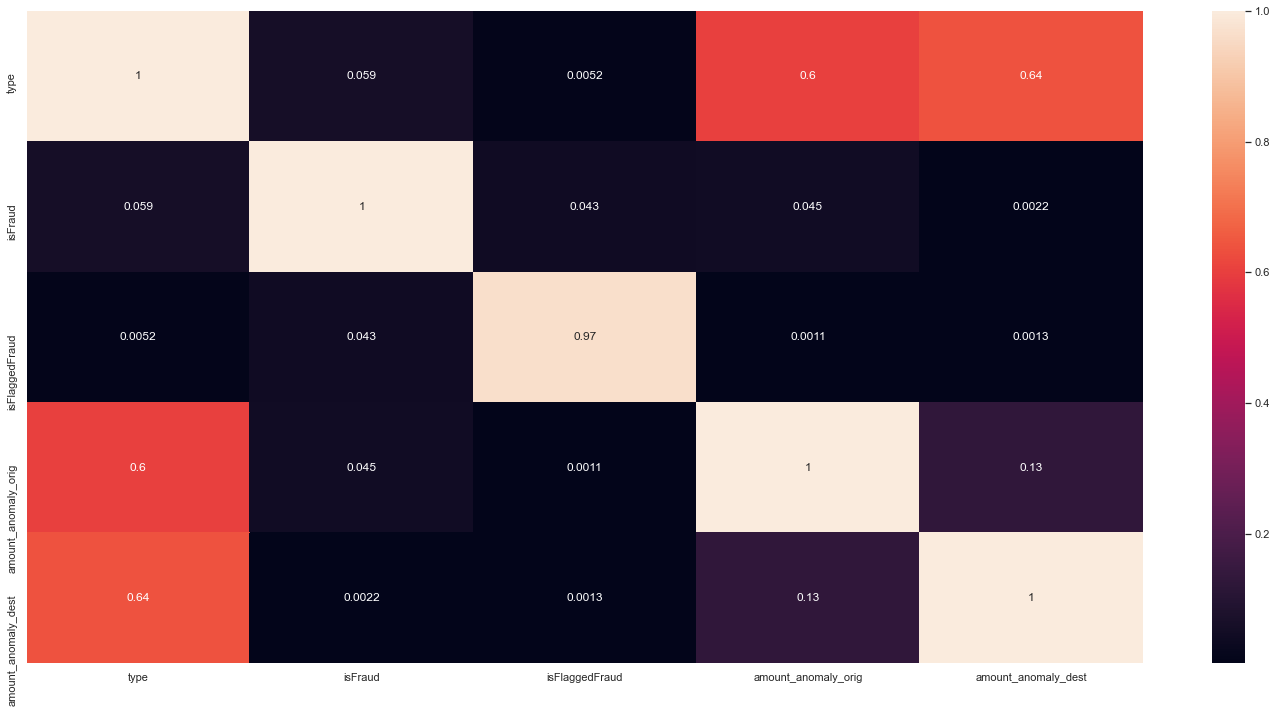

In [151]:
d = pd.DataFrame( corr_dict )
d = d.set_index( d.columns)
sns.heatmap( d, annot=True )

In [154]:
df2[df2['isFlaggedFraud']==1].amount.describe()

count    1.600000e+01
mean     4.861598e+06
std      3.572499e+06
min      3.538742e+05
25%      2.242749e+06
50%      4.234245e+06
75%      7.883451e+06
max      1.000000e+07
Name: amount, dtype: float64

In [155]:
df2[df2['isFraud']==1].amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

## baseline

In [59]:
df3=df2.copy()

### Prevendo tudo como fraude

In [95]:
def lucro_consultoria(row):
    if row['FraudPred']==1 and row['isFraud']==1:
        lucro=0.25*row['amount']
    elif row['FraudPred']==1 and row['isFraud']==0:
        lucro=0.05*row['amount']
    elif row['FraudPred']==0 and row['isFraud']==1:
        lucro=-1.00*row['amount']
    else:
        lucro=0*row['amount']
    return lucro

In [92]:
aux=df3.copy()
aux['FraudPred']=1

In [96]:
lucro_tudo_fraude=aux.apply(lucro_consultoria,axis=1)

In [97]:
lucro_tudo_fraude.sum()

59630930323.556496

In [98]:
df3['amount'].sum()

1144392944759.77

In [99]:
lucro_tudo_fraude.sum()/df3['amount'].sum()

0.05210704120172129

### 100% de acurácia

In [100]:
aux=df3.copy()
aux['FraudPred']=df3['isFraud']

In [101]:
lucro_acuracia_perfeita=aux.apply(lucro_consultoria,axis=1)

In [102]:
lucro_acuracia_perfeita.sum()

3014103856.96

In [103]:
lucro_acuracia_perfeita.sum()/df3['amount'].sum()

0.002633801502151622

In [104]:
lucro_tudo_fraude.sum()/lucro_acuracia_perfeita.sum()

19.78396669572619